

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
import warnings
warnings.filterwarnings ('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [4]:
#Read the data
df=pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.value_counts()

country      child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp 
Afghanistan  90.2        10.000   7.58    44.9000  1610    9.440      56.2        5.82       553      1
Morocco      33.5        32.200   5.20    43.0000  6440    0.976      73.5        2.58       2830     1
Myanmar      64.4        0.109    1.97    0.0659   3720    7.040      66.8        2.41       988      1
Namibia      56.0        47.800   6.78    60.7000  8460    3.560      58.6        3.60       5190     1
Nepal        47.0        9.580    5.25    36.4000  1990    15.100     68.3        2.61       592      1
                                                                                                     ..
Georgia      16.5        35.000   10.10   52.8000  6730    8.550      72.8        1.92       2960     1
Germany      4.2         42.300   11.60   37.1000  40400   0.758      80.1        1.39       41800    1
Ghana        74.7        29.500   5.22    45.9000  3060    16.600    

In [9]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
df.shape

(167, 10)

In [11]:
data=df.drop(['country'],axis=1)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<AxesSubplot:xlabel='child_mort'>

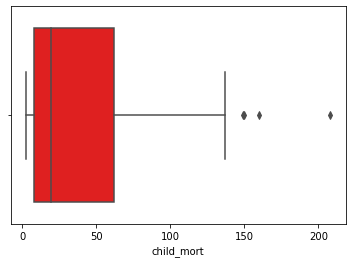

In [12]:
sns.boxplot(df["child_mort"],color="red")

<AxesSubplot:xlabel='exports'>

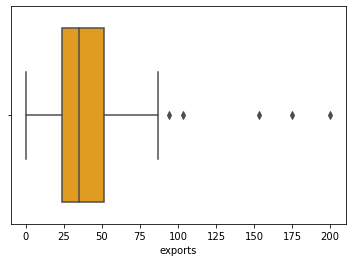

In [13]:
sns.boxplot(df["exports"],color="orange")

<AxesSubplot:xlabel='health'>

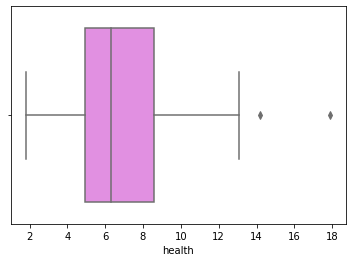

In [14]:
sns.boxplot(df["health"],color="violet")

<AxesSubplot:xlabel='imports'>

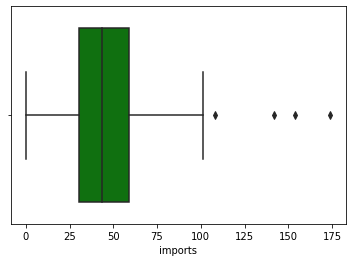

In [15]:

sns.boxplot(df["imports"],color="green")

<AxesSubplot:xlabel='income'>

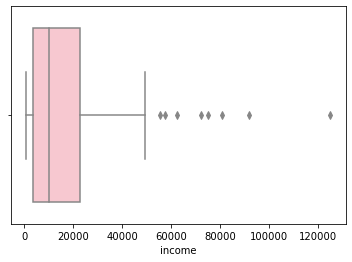

In [16]:
sns.boxplot(df["income"],color="pink")

<AxesSubplot:xlabel='inflation'>

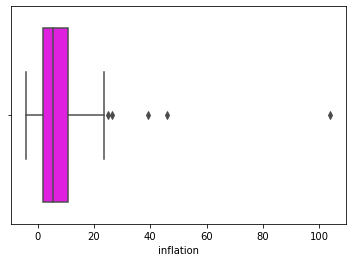

In [17]:
sns.boxplot(df["inflation"],color="magenta")

<AxesSubplot:xlabel='life_expec'>

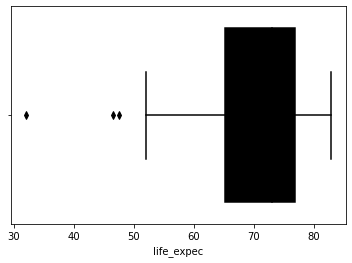

In [18]:

sns.boxplot(df["life_expec"],color="black")

<AxesSubplot:xlabel='total_fer'>

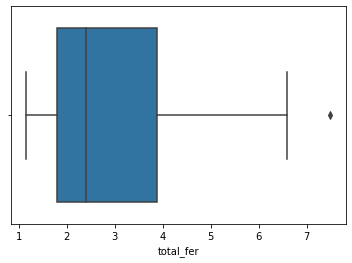

In [19]:
sns.boxplot(df["total_fer"])

<AxesSubplot:xlabel='gdpp'>

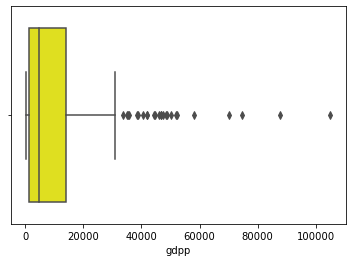

In [20]:

sns.boxplot(df["gdpp"],color="yellow")


The dataset is very small, therefore not removing the outliers

<AxesSubplot:>

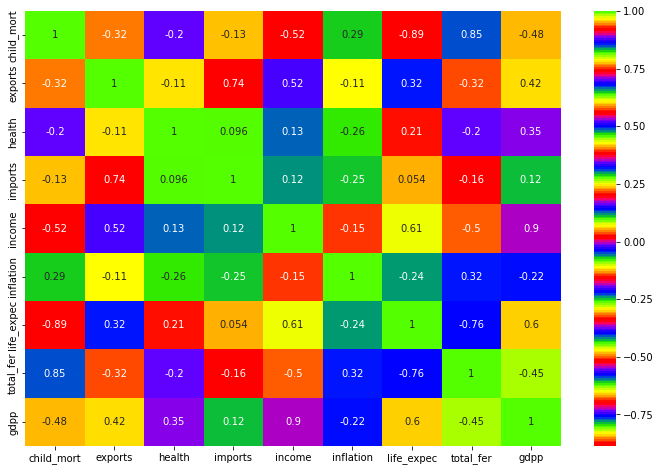

In [21]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot = True, cmap = "prism")

*gdpp and income are highly correlated

*child mortality and total fertility highly correlated

In [22]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [23]:
scaleddf=pd.DataFrame(scaled,columns=data.columns)
#print scaled dataset
scaleddf.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


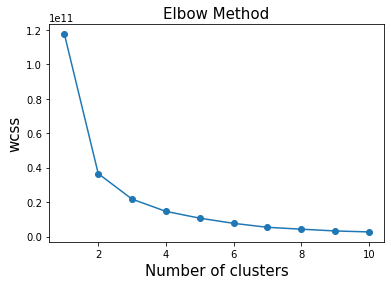

In [24]:
#kmeans
from sklearn .cluster import KMeans
WCSS=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(data)
    WCSS.append(kmean.inertia_)
plt.plot(range(1,11),WCSS,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.show()

In [25]:
#prediction
kmeans=KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(data)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [26]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(data)
kmeans_df['KMeans_Clusters'] = preds
#kmeans_df.head(10)

In [27]:
kmeans_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


<AxesSubplot:xlabel='child_mort', ylabel='health'>

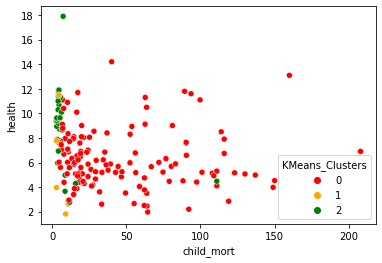

In [28]:
g=sns.scatterplot(kmeans_df['child_mort'],kmeans_df['health'],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])
g

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

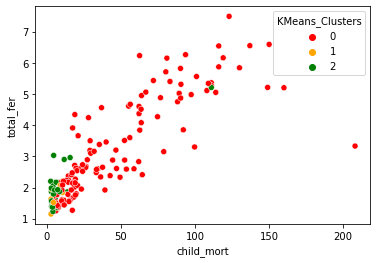

In [29]:
y=sns.scatterplot(kmeans_df['child_mort'],kmeans_df['total_fer'],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])
y

<AxesSubplot:xlabel='exports', ylabel='health'>

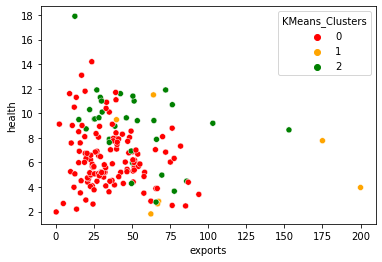

In [30]:
s=sns.scatterplot(kmeans_df['exports'],kmeans_df['health'],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])
s

<AxesSubplot:xlabel='KMeans_Clusters', ylabel='gdpp'>

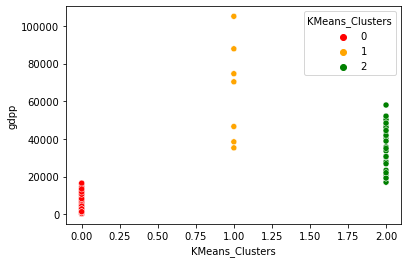

In [31]:
y=sns.scatterplot(kmeans_df['KMeans_Clusters'],kmeans_df["gdpp"],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])
y

<AxesSubplot:xlabel='income', ylabel='health'>

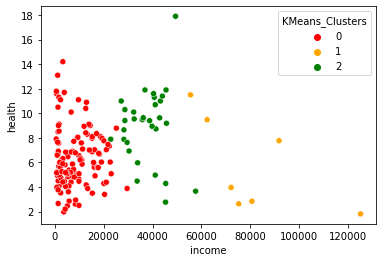

In [32]:
y=sns.scatterplot(kmeans_df['income'],kmeans_df["health"],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])
y

cluster 0 have lowest income

<AxesSubplot:xlabel='KMeans_Clusters', ylabel='child_mort'>

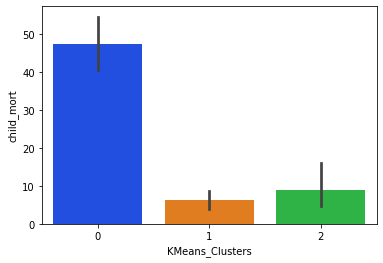

In [33]:
sns.barplot(x = 'KMeans_Clusters', y = 'child_mort', data=kmeans_df, palette="bright")

*we can observe thar cluster 0 have higher child mortality

*All these figures clearly makes this cluster the best candidate for the financial aid from NGO.

cluster 0-undeveloped

cluster1 - developing

cluster2 -developed

In [34]:
#undeveloped
undeveloped=kmeans_df[kmeans_df['KMeans_Clusters']==0]
print("Number of underdevolped countries",len(undeveloped))


Number of underdevolped countries 128


In [35]:
#developing
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]
print("Number of developing countries",len(developing))


Number of developing countries 7


In [36]:
#developed
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]
print("Number of developed countries",len(developed))

Number of developed countries 32


In [37]:
developed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
49,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2


In [38]:
developing

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


In [41]:
undeveloped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [42]:
country=df["country"]
country


0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [43]:
df=pd.DataFrame({'KMeans_Clusters':data['KMeans_Clusters'],'country':country})
df

,KMeans_Clusters,country
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,0,Yemen


In [44]:
 #countries in cluster 0
country_cluster0=list(df[df['KMeans_Clusters']==0].country)
country_cluster0


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'M

Clusters 2 & 1 seems to be Developed or Developing countries, so our segmentation is good in terms of all our undeveloped countries are segmented under cluster 0.

In [45]:
 #countries in cluster 1
country_cluster1=list(df[df['KMeans_Clusters']==1].country)
country_cluster1

['Brunei',
 'Kuwait',
 'Luxembourg',
 'Norway',
 'Qatar',
 'Singapore',
 'Switzerland']

In [46]:
 #countries in cluster 2
country_cluster2=list(df[df['KMeans_Clusters']==2].country)
country_cluster2

['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Equatorial Guinea',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Oman',
 'Portugal',
 'Saudi Arabia',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'United Arab Emirates',
 'United Kingdom',
 'United States']